In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from empath import Empath

%matplotlib inline

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
df = pd.read_csv('philosophy_data.csv')
df = df[['title', 'author', 'school', 'sentence_lowered', 'original_publication_date', 'sentence_length']]
df['century'] = df['original_publication_date'].apply(lambda x: x // 100 + 1 if x >= 0 else x // 100) 
df.head(5)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4


In [14]:
stop_words = stopwords.words('english')
other_stop_words = ['thy', 
                    'one', 
                    'two', 
                    'may', 
                    'would', 
                    'might', 
                    'two', 
                    'also', 
                    'must', 
                    'upon', 
                    'though', 
                    'often', 
                    'therefore',
                    'thus', 
                    'first',
                    'even', 
                    'thou',
                    'ye',
                    'unto',
                    'thee',
                    'either',
                    'doth',
                    'whatsoever',
                    'say',
                    'something',
                    'since',
                    'much',
                    'yet',
                    'another',
                    'every',
                    'without',
                    'merely',
                    'thing',
                    'things',
                    'like',
                    'great',
                    'still',
                    'however',
                    'way',
                    'say',
                    'us',
                    'something',
                    'said',
                    'well',
                    'without',
                    'see',
                    'thyself',
                    'shall',
                    'hath',
                    'many',
                    'anything']
stop_words = stop_words + other_stop_words

In [15]:
def normalize_text(txt):
    return ' '.join([word for word in word_tokenize(txt) if word not in stop_words and word.isalpha()])

df['normalized_sentence'] = df.apply(lambda row: normalize_text(str(row['sentence_lowered'])), axis = 1)
df['normalized_words_count'] = df['normalized_sentence'].apply(lambda word: len(word.split()))
df.head(5)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century,normalized_sentence,normalized_words_count
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4,new socrates make leave usual haunts lyceum sp...,12
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4,surely prosecuting anyone king archon,5
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4,athenians call prosecution indictment euthyphro,5
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4,,0
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4,someone indicted going tell indicted someone else,7


analytic


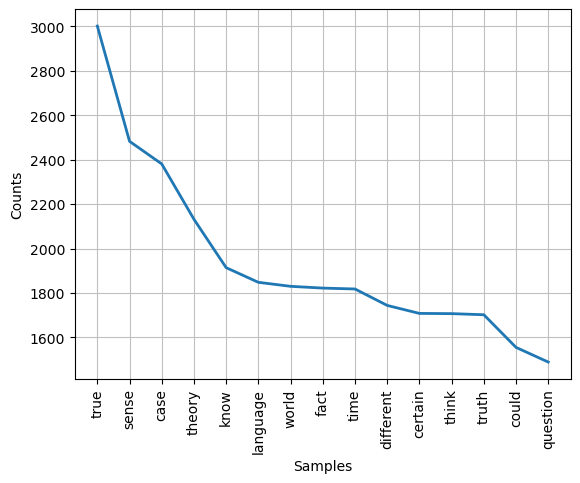

aristotle


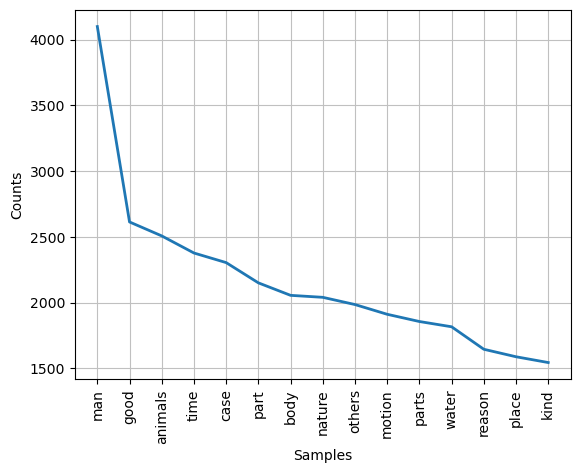

capitalism


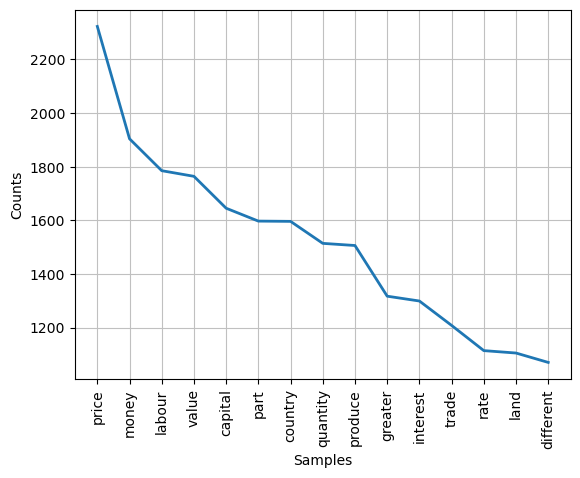

communism


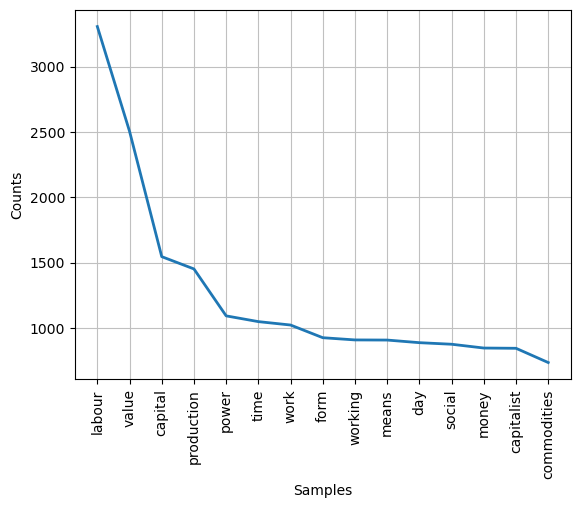

continental


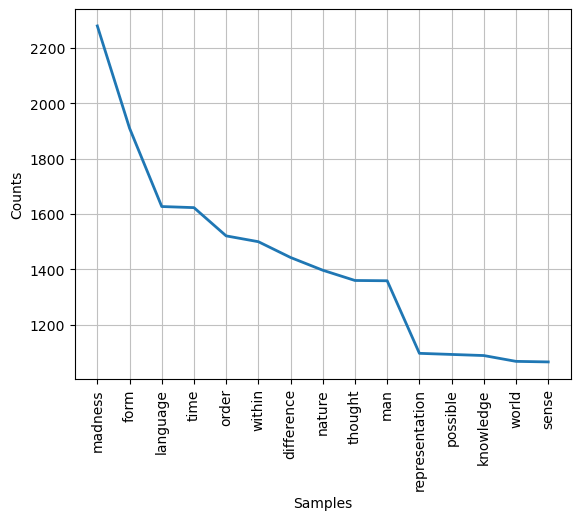

empiricism


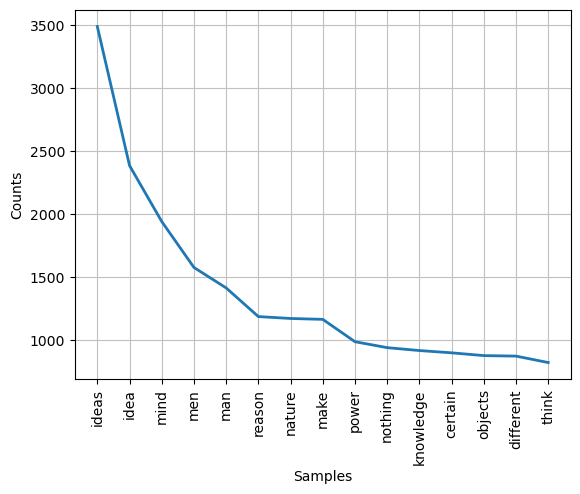

feminism


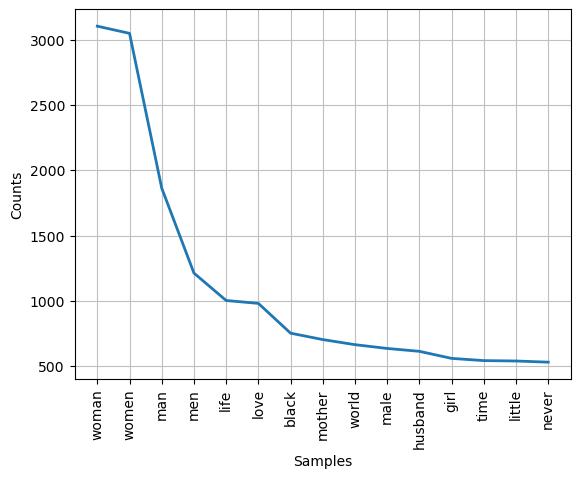

german_idealism


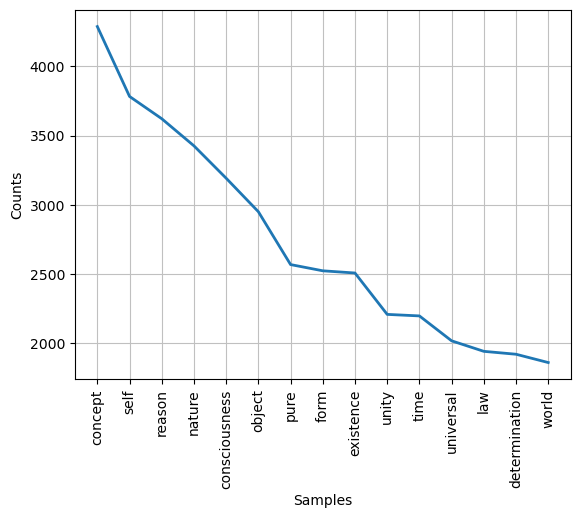

nietzsche


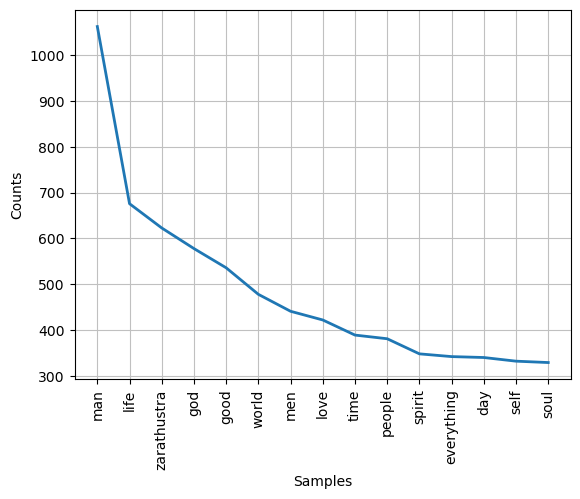

phenomenology


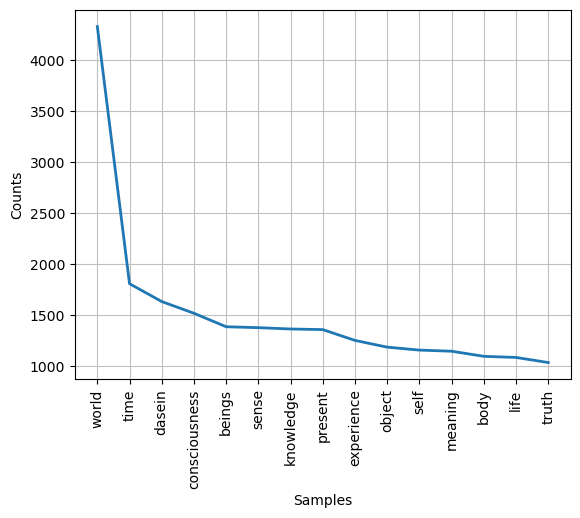

plato


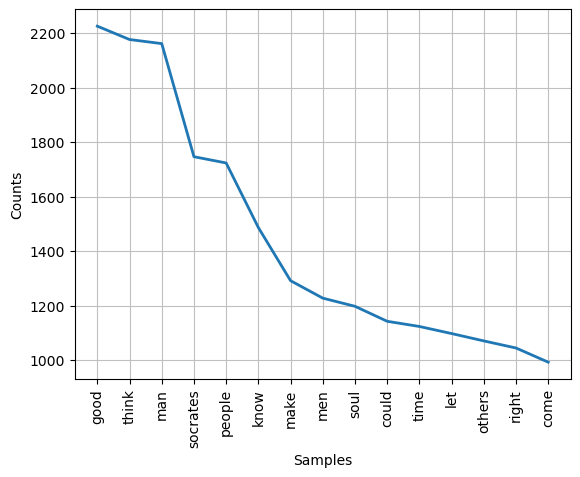

rationalism


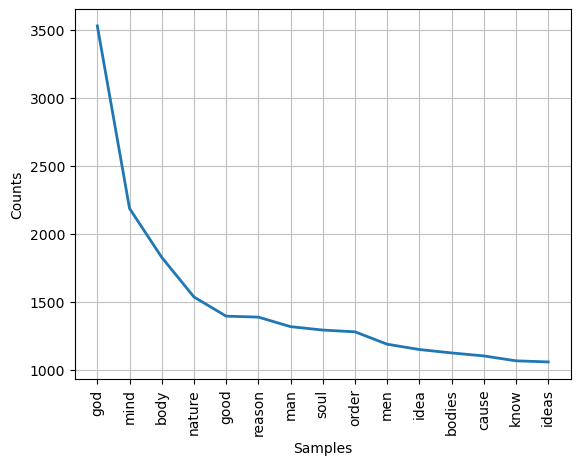

stoicism


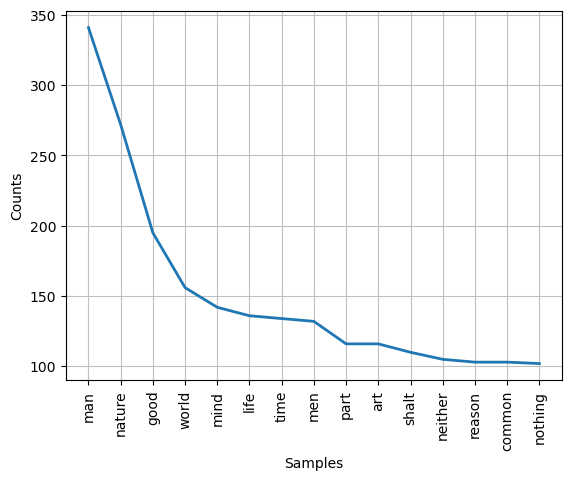

In [16]:
df_word_school = df.groupby('school')['normalized_sentence'].apply(lambda x: ' '.join(x))
for school, text in df_word_school.items():
    print(school)
    freqDist = FreqDist(text.split(" "))
    freqDist.plot(15)

In [18]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

df['sentiment_score'] = df['sentence_lowered'].apply(lambda x: get_sentiment_score(x))
df.head(3)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century,normalized_sentence,normalized_words_count,sentiment_score
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4,new socrates make leave usual haunts lyceum sp...,12,-0.2960
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4,surely prosecuting anyone king archon,5,0.4404
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4,athenians call prosecution indictment euthyphro,5,-0.3346


In [26]:
group_sentiment = df.groupby(['school'])['sentiment_score'].agg(['mean', 'median'])
group_sentiment

,mean,median
school,,
analytic,0.068723,0.0000
aristotle,0.097554,0.0000
capitalism,0.228965,0.2263
communism,0.102823,0.0000
continental,-0.001033,0.0000
empiricism,0.166642,0.0516
feminism,0.086910,0.0000
german_idealism,0.147454,0.0000
nietzsche,0.084688,0.0000


(-0.3, 0.3)

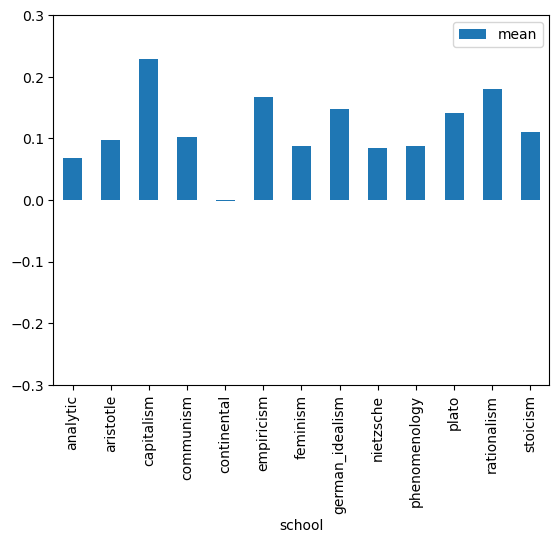

In [27]:
ax = group_sentiment.plot(y='mean', kind='bar')
ax.set_ylim([-0.3, 0.3])

In [ ]:
# IMPORTANTE: normalizar a quantidade de palavras mais usadas com as palavras totais de uma escola
# Fazer as conexões por uma linha do tempo, cad um separado por século
# Fazer a normalização de todos os dados, entre 0 e 1
# D3 -> biblioteca para charts gráficos
# Dendograma